In [36]:
from numpy import *
from matplotlib.pyplot import *
from time import time
import pandas as pd 
from scipy.stats import mode

#### Functions

In [54]:
def NNN(X:ndarray,y:ndarray,k,xt:ndarray,cont=False,return_mem=False):
    er = X-xt
    er2 = er**2
    dist2 = sum(er2,axis=1)
    m = 0
    N,D = X.shape
    if len(dist2) > k :
        i = argpartition(dist2,k+1)[:k]
        yf = y[i]
        yf.astype(dtype=float128,copy=False)
        m = yf.nbytes + i.nbytes
    else :
        yf = y
    if cont : 
        yp = mean(yf)
    else : 
        yp = int(mode(yf)[0])
    if return_mem:
        m = m + X.nbytes + y.nbytes + xt.nbytes + er.nbytes + er2.nbytes
        return yp,m
    return yp

def LinearData(N=100,D=2,err=0.01,continuous=False,scale=3):
    X = random.random((N,D))
    W = 2*random.random(D)-1
    y = scale*dot(X,W)
    y = y + err*random.random(N)
    if not continuous:
        y = y.astype(int64)
    return X,y


#### NNN in action

/tmp/ipykernel_192671/2038279913.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


Accuracy :  93.0 %


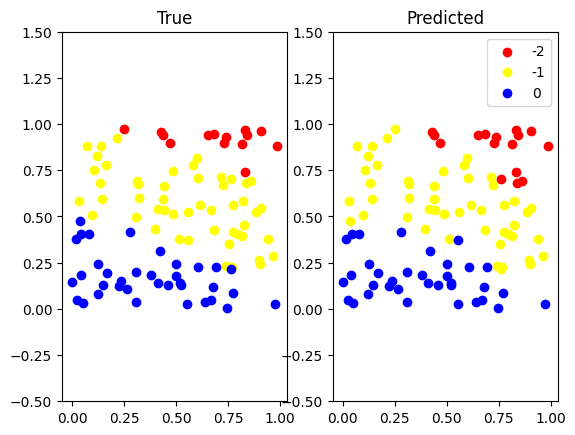

In [38]:
N,K = 100,5
X,y = LinearData(2*N,scale=3)
X,y,Xt,yt = X[:N],y[:N],X[N:],y[N:]
yp = []
acc = 0
for i in range(N):
    yp.append(NNN(X,y,K,Xt[i],False))
    acc += (yp[i]==yt[i])
acc = acc/N
yp = array(yp)
f = figure()
s1 = f.add_subplot(121)
s2 = f.add_subplot(122)
colors = ['red','yellow','blue','grey','green','violet','purple','pink']
i = 0
for yval in unique(yt):
    s1.scatter(Xt[:,0][yt==yval],Xt[:,1][yt==yval],c=colors[i])
    s2.scatter(Xt[:,0][yp==yval],Xt[:,1][yp==yval],c=colors[i])
    i+= 1
s1.set_title('True')
s2.set_title('Predicted')
s1.set_ylim(-0.5,1.5)
s2.set_ylim(-0.5,1.5)
legend([str(y) for y in unique(yt)])
print("Accuracy : ",acc*100,"%")
show()

### Time Complexity

#### Theory

K-NN has 0 training time since there is no training phase and it has a theoritical testing time complexity of $ O(ND+NK) $ . In the above implementation, the complexity is just $ O(ND) $ since the $ NK $ comes from finding the $ K $ nearest data points to the test point after finding the distances. This can be done by quickselect in $ O(NK) $.

#### Variation of test time with $ N $

/tmp/ipykernel_104037/1999652387.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


Text(0, 0.5, 'test time')

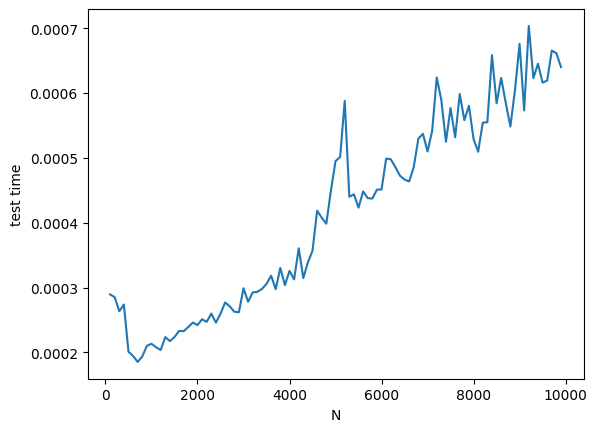

In [55]:
iterations = 100
test_time = []
L = range(100,10000,100)
#L = [2,5,10,50,100,500,1000]
for N in L:
    X,y = LinearData(N)
    t0 = time()
    for _ in range(iterations):
        NNN(X,y,5,X[0])
    t = time()
    dt = t - t0
    dt = dt/iterations
    test_time.append(dt)
plot(L,test_time)
xlabel("N")
ylabel("test time")


/tmp/ipykernel_169647/380915566.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


Text(0, 0.5, 'test time')

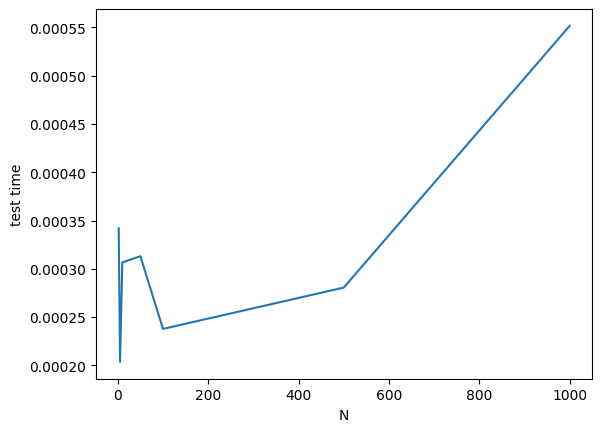

In [24]:
iterations = 100
test_time = []
#L = range(100,10000,100)
L = [2,5,10,50,100,500,1000]
for N in L:
    X,y = LinearData(N)
    t0 = time()
    for _ in range(iterations):
        NNN(X,y,5,X[0])
    t = time()
    dt = t - t0
    dt = dt/iterations
    test_time.append(dt)
plot(L,test_time)
xlabel("N")
ylabel("test time")

Thus, the test time grows as $ O(N) $

#### Variation of test time with $ D $

/tmp/ipykernel_104037/1999652387.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


Text(0, 0.5, 'test time')

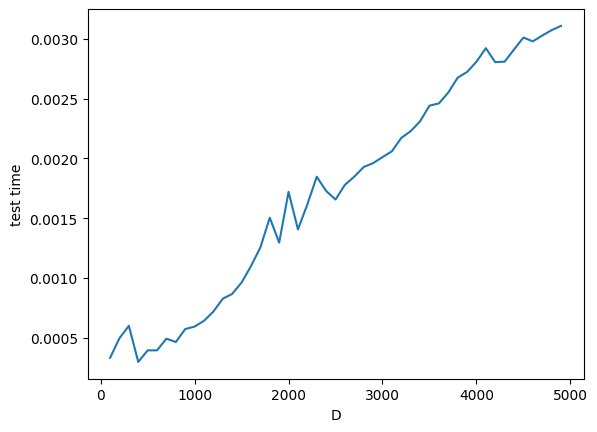

In [56]:
iterations = 100
test_time = []
L = range(100,5000,100)
#L = [2,5,10,20,50]
for D in L:
    X,y = LinearData(D=D)
    t0 = time()
    for _ in range(iterations):
        NNN(X,y,5,X[0])
    t = time()
    dt = t - t0
    dt = dt/iterations
    test_time.append(dt)
plot(L,test_time)
xlabel("D")
ylabel("test time")


/tmp/ipykernel_170588/380915566.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


Text(0, 0.5, 'test time')

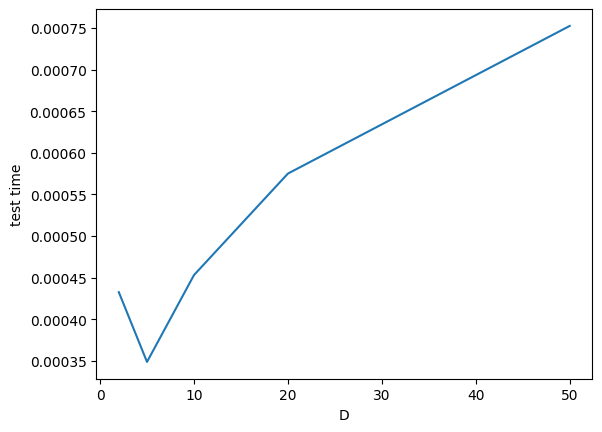

In [3]:
iterations = 100
test_time = []
#L = range(100,5000,100)
L = [2,5,10,20,50]
for D in L:
    X,y = LinearData(D=D,N=1000)
    t0 = time()
    for _ in range(iterations):
        NNN(X,y,5,X[0])
    t = time()
    dt = t - t0
    dt = dt/iterations
    test_time.append(dt)
plot(L,test_time)
xlabel("D")
ylabel("test time")


Thus, the test time grows as $ O(D) $

#### Variation of test time with $ K $

/tmp/ipykernel_192671/4014939518.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


Text(0, 0.5, 'test time')

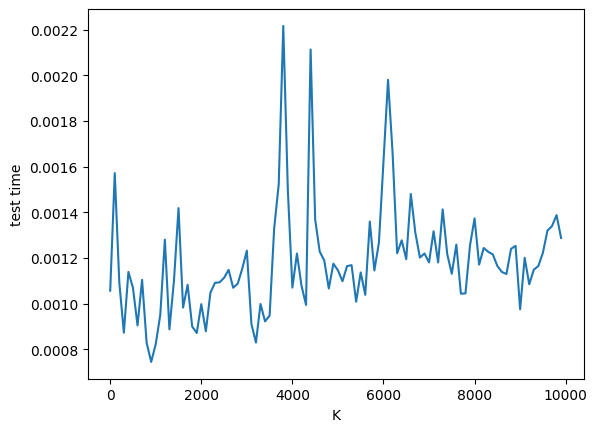

In [71]:
iterations = 100
test_time = []
N=10000
for K in range(1,N,N//100):
    X,y = LinearData(N)
    t0 = time()
    for _ in range(iterations):
        NNN(X,y,K,X[0])
    t = time()
    dt = t - t0
    dt = dt/iterations
    test_time.append(dt)
plot(arange(1,N,N//100),test_time)
xlabel("K")
ylabel("test time")


Thus, the test time grows as $ O(K) $ with $ K $

### Space complexity 

#### Theory

The inputs $ X,y,x_t $ have sizes $N \times D ,\; N,\; D$ . We compute the matrices `err`, `err2` and `dist2` which have sizes $ N\times D , \; N\times D , \; , N $ . We then compute the indices of the first $ K $ smallest numbers in `dist2`, giving us a $ K $ size array `i`, and we use that to ge the corresponding targets, namely the `yf` array of size $ K $ . Thus, the maximum space required is $ O(ND + K)$ in case, the number of samples are less that $ K $, we poceed without this step, just setting `yf=y`. In these cases, the space complexity is $O(ND)$ . Thus, we can write a combined result as 

$$
O(ND + \mathbb{I}(K<N)\cdot K)
$$


##### Variation with $ N $

/tmp/ipykernel_192671/2038279913.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


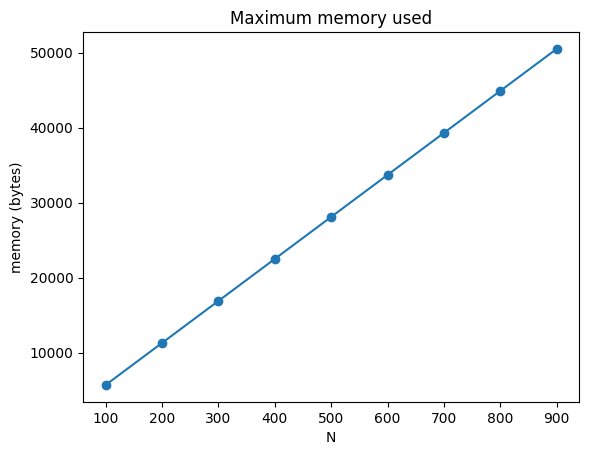

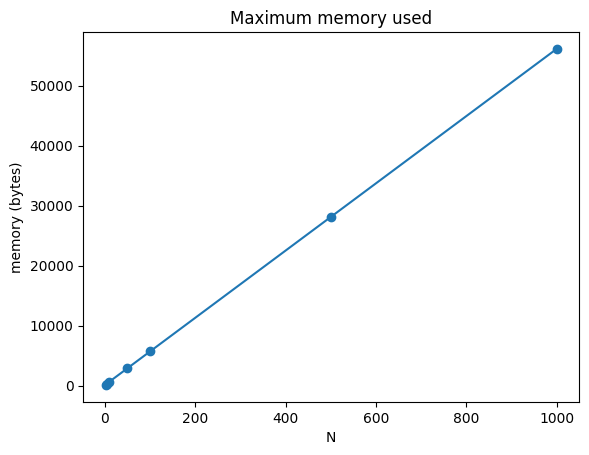

In [22]:
iterations = 100
Ll = [range(100,1000,100) ,[2,5,10,50,100,500,1000]]
for L in Ll : 
    test_memory = []
    figure()
    for N in L:
        X,y = LinearData(N)
        mem = 0
        for _ in range(iterations):
            yp,m = NNN(X,y,5,X[0],False,True)
            mem = mem + m
        mem = mem/iterations
        test_memory.append(mem)
    plot(L,test_memory,'-o')
    xlabel("N")
    ylabel("memory (bytes)")
    title("Maximum memory used")

#### Variation with $ D $

/tmp/ipykernel_192671/2038279913.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


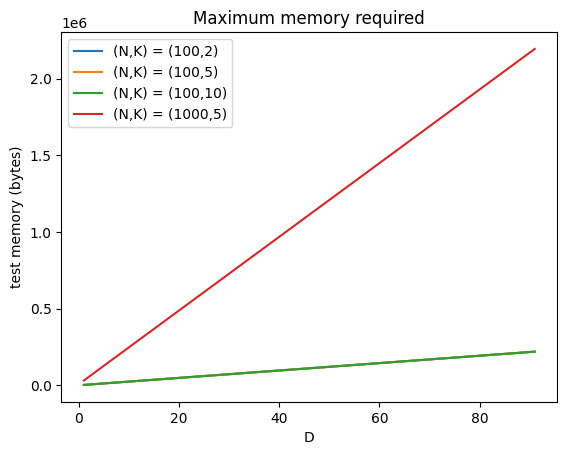

In [35]:
iterations = 100
KN = [(2,100),(5,100),(10,100),(5,1000)]
for (K,N) in KN:
    test_memory = []
    for D in range(1,100,10):
        mem = 0
        X,y = LinearData(N=N,D=D)
        for _ in range(iterations):
            yp,m = NNN(X,y,K,X[0],False,True)
            mem += m
        mem = mem/iterations
        test_memory.append(mem)
    plot(arange(1,100,10),test_memory)
xlabel("D")
ylabel("test memory (bytes)")
title("Maximum memory required")
legend([f"(N,K) = ({N},{K})" for (K,N) in KN])


#### Variation with $ K $

/tmp/ipykernel_192671/4014939518.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp = int(mode(yf)[0])


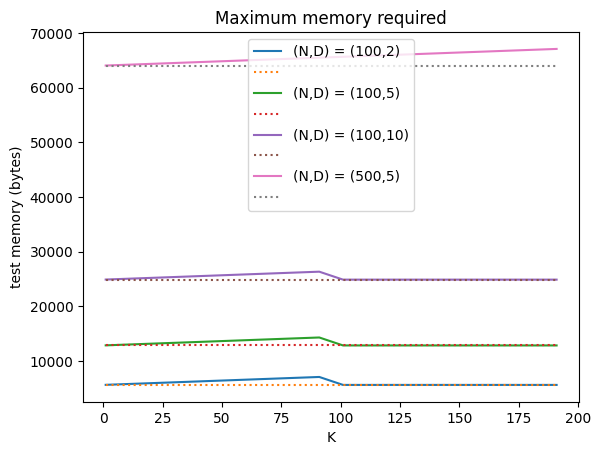

In [69]:
iterations = 100
DN = [(2,100),(5,100),(10,100),(5,500)]
for (D,N) in DN:
    test_memory = []
    for K in range(1,200,10):
        mem = 0
        X,y = LinearData(N=N,D=D)
        for _ in range(iterations):
            yp,m = NNN(X,y,K,X[0],False,True)
            mem += m
        mem = mem/iterations
        test_memory.append(mem)
    plot(arange(1,200,10),test_memory)
    plot([1,191],[amin(test_memory)]*2,':')
xlabel("K")
ylabel("test memory (bytes)")
title("Maximum memory required")
L = []
for (D,N) in DN :
    L.extend([f"(N,D) = ({N},{D})",''])
legend(L)

#### Conclusion

The maximum memory needed grows linearly with all of $N,D,K$ , with the slope for growth with $ D $, increasing with $ N $, and the growth with $ K $ becoming negative and stopping after the $ K = N $ mark. Thus, our estimate of $ O(ND + \mathbb{I}(K<N)\cdot K) $ looks correct.